In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

In [34]:
df = pd.read_csv("../data/ecg_data.csv")

In [35]:
df

,ECG,Time
0,0.031373,0.000000
1,0.057770,0.002778
2,-0.043962,0.005556
3,0.136942,0.008333
4,0.127039,0.011111
...,...,...
4995,0.341626,13.875000
4996,0.279794,13.877778
4997,0.205529,13.880556
4998,0.190672,13.883333


In [36]:
scaler = MinMaxScaler()
df["ECG_scaled"] = scaler.fit_transform(df[["ECG"]])

In [37]:
df

,ECG,Time,ECG_scaled
0,0.031373,0.000000,0.204575
1,0.057770,0.002778,0.208528
2,-0.043962,0.005556,0.193293
3,0.136942,0.008333,0.220385
4,0.127039,0.011111,0.218902
...,...,...,...
4995,0.341626,13.875000,0.251040
4996,0.279794,13.877778,0.241779
4997,0.205529,13.880556,0.230657
4998,0.190672,13.883333,0.228432


In [38]:
len(df)

5000

In [39]:
len(df)-180

4820

In [40]:
# Sequence creation
def create_sequences(data, seq_length=180):
    return np.array([data[i:i + seq_length] for i in range(len(data) - seq_length)])

123

234

345

456

567

678

789


In [65]:
seq_data = create_sequences(df["ECG_scaled"].values)

In [66]:
seq_data

array([[0.20457522, 0.20852845, 0.19329282, ..., 0.04410476, 0.04892884,
        0.04400907],
       [0.20852845, 0.19329282, 0.22038549, ..., 0.04892884, 0.04400907,
        0.04554072],
       [0.19329282, 0.22038549, 0.21890241, ..., 0.04400907, 0.04554072,
        0.05163155],
       ...,
       [0.01196549, 0.03165751, 0.03874214, ..., 0.25701889, 0.25103974,
        0.2417795 ],
       [0.03165751, 0.03874214, 0.03371712, ..., 0.25103974, 0.2417795 ,
        0.23065738],
       [0.03874214, 0.03371712, 0.03483504, ..., 0.2417795 , 0.23065738,
        0.22843226]])

In [67]:
seq_data[0]

array([0.20457522, 0.20852845, 0.19329282, 0.22038549, 0.21890241,
       0.21437619, 0.22176156, 0.226054  , 0.22763748, 0.23723387,
       0.24014181, 0.25145395, 0.24594329, 0.25346174, 0.25033806,
       0.26054643, 0.25583022, 0.27686574, 0.26871931, 0.28146256,
       0.27294501, 0.28199886, 0.29668023, 0.29301622, 0.29275115,
       0.29213005, 0.29380528, 0.30014366, 0.31283389, 0.31092396,
       0.31459639, 0.31314904, 0.31603005, 0.33023607, 0.33063907,
       0.3322322 , 0.33381738, 0.3518433 , 0.35276799, 0.34087619,
       0.33348025, 0.3519724 , 0.35048518, 0.33254655, 0.35292874,
       0.35413959, 0.36132471, 0.37040598, 0.66133332, 0.37059589,
       0.36303367, 0.36604249, 0.36018391, 0.3693122 , 0.8017666 ,
       0.36736963, 0.36991227, 0.37592492, 0.37932619, 0.36595531,
       0.37803985, 0.36401236, 0.37047021, 0.37536839, 0.78201604,
       0.37033539, 0.38368138, 0.37403731, 0.37458785, 0.38321274,
       0.37683937, 0.38183076, 0.38840396, 0.37770712, 0.37240

In [68]:
seq_data[1]

array([0.20852845, 0.19329282, 0.22038549, 0.21890241, 0.21437619,
       0.22176156, 0.226054  , 0.22763748, 0.23723387, 0.24014181,
       0.25145395, 0.24594329, 0.25346174, 0.25033806, 0.26054643,
       0.25583022, 0.27686574, 0.26871931, 0.28146256, 0.27294501,
       0.28199886, 0.29668023, 0.29301622, 0.29275115, 0.29213005,
       0.29380528, 0.30014366, 0.31283389, 0.31092396, 0.31459639,
       0.31314904, 0.31603005, 0.33023607, 0.33063907, 0.3322322 ,
       0.33381738, 0.3518433 , 0.35276799, 0.34087619, 0.33348025,
       0.3519724 , 0.35048518, 0.33254655, 0.35292874, 0.35413959,
       0.36132471, 0.37040598, 0.66133332, 0.37059589, 0.36303367,
       0.36604249, 0.36018391, 0.3693122 , 0.8017666 , 0.36736963,
       0.36991227, 0.37592492, 0.37932619, 0.36595531, 0.37803985,
       0.36401236, 0.37047021, 0.37536839, 0.78201604, 0.37033539,
       0.38368138, 0.37403731, 0.37458785, 0.38321274, 0.37683937,
       0.38183076, 0.38840396, 0.37770712, 0.3724091 , 0.36406

In [69]:
X_train = seq_data[:int(0.8*len(seq_data))]

In [70]:
X_train

array([[0.20457522, 0.20852845, 0.19329282, ..., 0.04410476, 0.04892884,
        0.04400907],
       [0.20852845, 0.19329282, 0.22038549, ..., 0.04892884, 0.04400907,
        0.04554072],
       [0.19329282, 0.22038549, 0.21890241, ..., 0.04400907, 0.04554072,
        0.05163155],
       ...,
       [0.38851726, 0.38417399, 0.38231637, ..., 0.08173381, 0.47519175,
        0.09022526],
       [0.38417399, 0.38231637, 0.3850374 , ..., 0.47519175, 0.09022526,
        0.09765935],
       [0.38231637, 0.3850374 , 0.37643592, ..., 0.09022526, 0.09765935,
        0.09770307]])

In [71]:
X_test = seq_data[int(0.8*len(seq_data)):]

In [72]:
x_test

array([[0.3850374 , 0.37643592, 0.39201043, ..., 0.09765935, 0.09770307,
        0.10377592],
       [0.37643592, 0.39201043, 0.38283324, ..., 0.09770307, 0.10377592,
        0.10710065],
       [0.39201043, 0.38283324, 0.38266305, ..., 0.10377592, 0.10710065,
        0.11023828],
       ...,
       [0.01196549, 0.03165751, 0.03874214, ..., 0.25701889, 0.25103974,
        0.2417795 ],
       [0.03165751, 0.03874214, 0.03371712, ..., 0.25103974, 0.2417795 ,
        0.23065738],
       [0.03874214, 0.03371712, 0.03483504, ..., 0.2417795 , 0.23065738,
        0.22843226]])

In [73]:
X_train.shape[1]

180

In [74]:
X_train = X_train[..., np.newaxis]  # shape: (samples, timesteps, 1)
X_test = X_test[..., np.newaxis]


In [75]:
X_train

array([[[0.20457522],
        [0.20852845],
        [0.19329282],
        ...,
        [0.04410476],
        [0.04892884],
        [0.04400907]],

       [[0.20852845],
        [0.19329282],
        [0.22038549],
        ...,
        [0.04892884],
        [0.04400907],
        [0.04554072]],

       [[0.19329282],
        [0.22038549],
        [0.21890241],
        ...,
        [0.04400907],
        [0.04554072],
        [0.05163155]],

       ...,

       [[0.38851726],
        [0.38417399],
        [0.38231637],
        ...,
        [0.08173381],
        [0.47519175],
        [0.09022526]],

       [[0.38417399],
        [0.38231637],
        [0.3850374 ],
        ...,
        [0.47519175],
        [0.09022526],
        [0.09765935]],

       [[0.38231637],
        [0.3850374 ],
        [0.37643592],
        ...,
        [0.09022526],
        [0.09765935],
        [0.09770307]]])

In [76]:
X_test

array([[[0.3850374 ],
        [0.37643592],
        [0.39201043],
        ...,
        [0.09765935],
        [0.09770307],
        [0.10377592]],

       [[0.37643592],
        [0.39201043],
        [0.38283324],
        ...,
        [0.09770307],
        [0.10377592],
        [0.10710065]],

       [[0.39201043],
        [0.38283324],
        [0.38266305],
        ...,
        [0.10377592],
        [0.10710065],
        [0.11023828]],

       ...,

       [[0.01196549],
        [0.03165751],
        [0.03874214],
        ...,
        [0.25701889],
        [0.25103974],
        [0.2417795 ]],

       [[0.03165751],
        [0.03874214],
        [0.03371712],
        ...,
        [0.25103974],
        [0.2417795 ],
        [0.23065738]],

       [[0.03874214],
        [0.03371712],
        [0.03483504],
        ...,
        [0.2417795 ],
        [0.23065738],
        [0.22843226]]])

In [77]:
print("Train stats:", np.min(X_train), np.max(X_train), np.isnan(X_train).any())


Train stats: 0.0029601801256550486 1.0 False


In [79]:
# Model (no relu!)
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),
    RepeatVector(X_train.shape[1]),
    LSTM(64, return_sequences=True),
    TimeDistributed(Dense(1))
])

**never use relu activation

LSTM-based autoencoder for time series anomaly detection — very powerful for ECG/EEG/IoT signals where normal behavior follows a temporal pattern.

a neural network to reconstruct normal time series. During inference, it will try to reconstruct all sequences. If the reconstruction error (MSE) is high, it likely means the input was anomalous.

1. LSTM(64, return_sequences=False)
Learns temporal patterns in the input time series.

Outputs a fixed-length vector (latent representation) from the input window.

Acts as an encoder.

🔹 2. RepeatVector(X_train.shape[1])
Duplicates the latent vector for each timestep in the original sequence.

Prepares the latent code to be passed to the decoder.

Think of this like preparing the decoder to generate a full time sequence.

🔹 3. LSTM(64, return_sequences=True)
Acts as the decoder.

Tries to generate a sequence from the repeated latent vector, step by step.

🔹 4. TimeDistributed(Dense(1))
Applies a dense (fully connected) layer at each time step.

Outputs one value per time step (same shape as original input).

In [81]:
from tensorflow.keras.optimizers import Adam

In [82]:
# Model (no relu!)
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)

In [84]:
model.compile(optimizer=optimizer, loss="mse")

X_train[..., np.newaxis]?
Your X_train is 2D: shape (samples, timesteps)

LSTM needs 3D input: (samples, timesteps, features)

So you reshape it to (samples, timesteps, 1) — one feature per timestep (univariate time series)

🔹 Training Objective
It tries to reconstruct each sequence.

Loss is mean squared error (MSE) between original and reconstructed sequences.

In [98]:

model.fit(X_train, X_train, epochs=3, batch_size=32)


Epoch 1/3
121/121 [==============================] - 13s 103ms/step - loss: 0.0097
Epoch 2/3
121/121 [==============================] - 16s 136ms/step - loss: 0.0079
Epoch 3/3
121/121 [==============================] - 17s 137ms/step - loss: 0.0077


In [101]:
# Predict
recons = model.predict(X_test)

31/31 [==============================] - 1s 35ms/step


In [102]:
recons

array([[[0.18935595],
        [0.28422236],
        [0.3455658 ],
        ...,
        [0.04795083],
        [0.04886845],
        [0.04983139]],

       [[0.18911278],
        [0.28378952],
        [0.3449732 ],
        ...,
        [0.04831148],
        [0.04934075],
        [0.05041718]],

       [[0.18884422],
        [0.28330386],
        [0.34430432],
        ...,
        [0.04906048],
        [0.05019773],
        [0.05138353]],

       ...,

       [[0.06291842],
        [0.07018633],
        [0.07218628],
        ...,
        [0.28306425],
        [0.27974534],
        [0.27640045]],

       [[0.06353249],
        [0.07129491],
        [0.07368682],
        ...,
        [0.277948  ],
        [0.27456713],
        [0.271163  ]],

       [[0.06417336],
        [0.07244252],
        [0.07523065],
        ...,
        [0.27302986],
        [0.26959515],
        [0.2661399 ]]], dtype=float32)

In [103]:
mse = np.mean((X_test - recons)**2, axis=(1, 2))

In [104]:
mse

array([0.0056882 , 0.00568076, 0.00570471, 0.00569194, 0.00568536,
       0.00568237, 0.00565543, 0.0056818 , 0.00568543, 0.00568834,
       0.00571291, 0.00573515, 0.00576413, 0.006829  , 0.00685073,
       0.00785473, 0.00789536, 0.00797002, 0.00819923, 0.00674915,
       0.00667012, 0.00664213, 0.00656625, 0.00654502, 0.00651732,
       0.0065184 , 0.00653254, 0.00656323, 0.00664777, 0.00681559,
       0.0070641 , 0.00744407, 0.00641675, 0.00672566, 0.00538948,
       0.00538696, 0.00535333, 0.00534728, 0.00536485, 0.00538529,
       0.00540166, 0.00545822, 0.0055556 , 0.00577468, 0.0060968 ,
       0.00508035, 0.00528149, 0.00556121, 0.00414919, 0.00414247,
       0.00413366, 0.00412305, 0.00411453, 0.00410697, 0.00410915,
       0.00412073, 0.00411293, 0.00411226, 0.00409647, 0.00407335,
       0.00406884, 0.00403612, 0.00403371, 0.00401558, 0.00402198,
       0.00401203, 0.00400931, 0.00401531, 0.00400673, 0.00401244,
       0.0040009 , 0.00397858, 0.003978  , 0.00396295, 0.00396

In [105]:
threshold = np.percentile(mse, 95)

In [106]:
threshold

0.009968277446856093

In [107]:
anomalies = mse > threshold

In [108]:
anomalies

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [109]:
anomalies.shape

(964,)

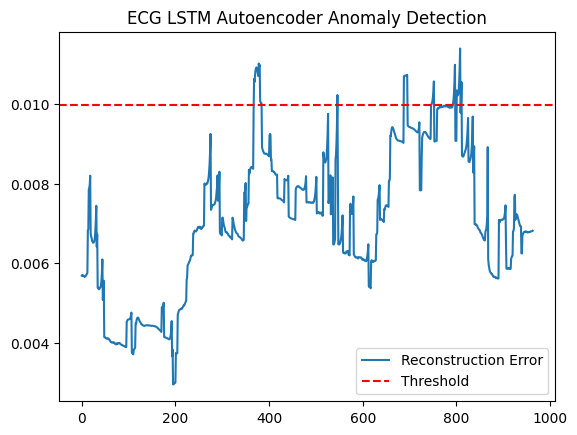

In [110]:

plt.plot(mse, label="Reconstruction Error")
plt.axhline(y=threshold, color="r", linestyle="--", label="Threshold")
plt.title("ECG LSTM Autoencoder Anomaly Detection")
plt.legend()
plt.show()